In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

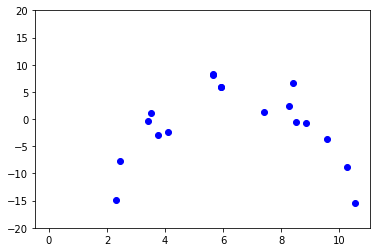

In [2]:

np.random.seed(14)
x = np.random.uniform(0, 11, 20)
x = np.sort(x)
y = (-x+4) * (x-9) + np.random.normal(0, 3,20)
plt.scatter(x, y, color='blue')
plt.ylim([-20, 20]);

In [3]:
lin_fit = np.polyfit(x, y, 1)
lin_fit

array([  2.10158547, -16.74065679])

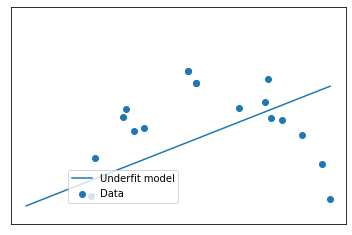

In [4]:
plt.scatter(x, y, label='Data')
plt.plot(x, np.polyval(lin_fit, x), label='Underfit model')
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20]);

In [5]:
x_fit = np.polyfit(x, y, 14)
x_fit

array([-1.96304148e-06,  1.53805390e-04, -5.41952312e-03,  1.13470267e-01,
       -1.57136110e+00,  1.51600670e+01, -1.04527159e+02,  5.19617748e+02,
       -1.85270228e+03,  4.63798302e+03, -7.78270833e+03,  7.94659312e+03,
       -3.89036358e+03,  2.73576004e+02, -3.93249354e+01])

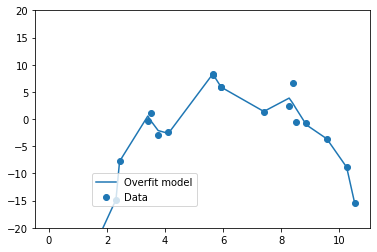

In [6]:
plt.scatter(x, y, label='Data')
plt.plot(x, np.polyval(x_fit, x), label='Overfit model')
plt.legend(loc=[0.17, 0.1])
plt.ylim([-20, 20]);

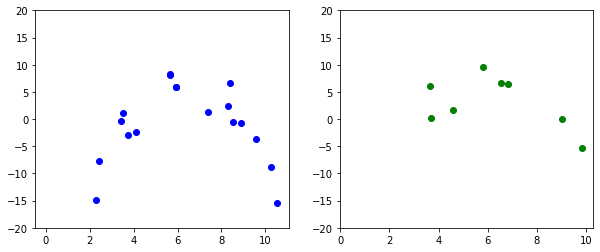

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
np.random.seed(14)
plt.scatter(x, y, color='blue')
plt.ylim([-20, 20])

plt.subplot(1, 2, 2)
np.random.seed(6)
X = np.random.uniform(0, 11, 10)
X = np.sort(X)
Y = (-X+4) * (X-9) + np.random.normal(0, 3,10)
plt.scatter(X, Y, color='green')
plt.ylim([-20, 20]);


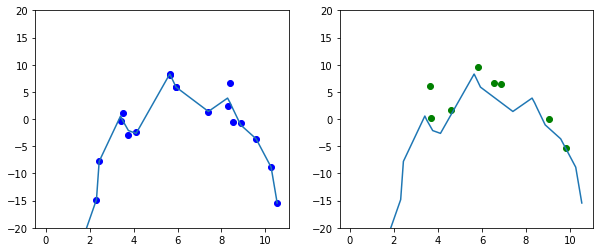

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
np.random.seed(14)
plt.scatter(x, y, color='blue')
plt.plot(x, np.polyval(x_fit, x), label='Overfit model')
plt.ylim([-20, 20])

plt.subplot(1, 2, 2)
np.random.seed(6)
plt.scatter(X, Y, color='green')
plt.plot(x, np.polyval(x_fit, x), label='Overfit model')
plt.ylim([-20, 20]);

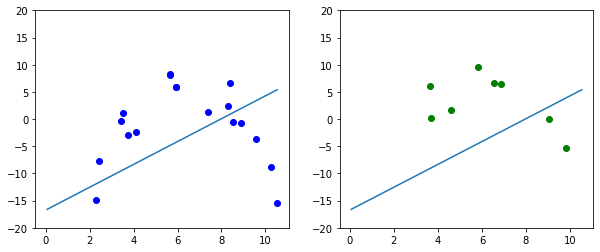

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
np.random.seed(14)
plt.scatter(x, y, color='blue')
plt.plot(x, np.polyval(lin_fit, x), label='Underfit model')
plt.ylim([-20, 20])

plt.subplot(1, 2, 2)
np.random.seed(6)
plt.scatter(X, Y, color='green')
plt.plot(x, np.polyval(lin_fit, x), label='Underfit model')
plt.ylim([-20, 20]);

In [10]:
poly_fit = np.polyfit(x, y, 2)
poly_fit


array([ -1.14606811,  14.53186902, -39.11976463])

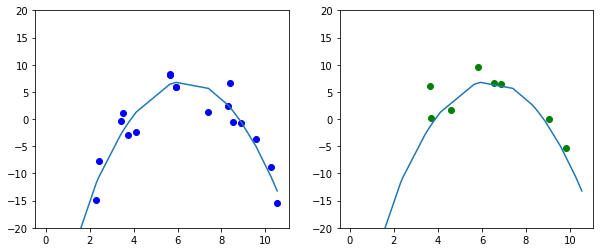

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
np.random.seed(14)
plt.scatter(x, y, color='blue')
plt.plot(x, np.polyval(poly_fit, x), label='Overfit model')
plt.ylim([-20, 20])

plt.subplot(1, 2, 2)
np.random.seed(6)
plt.scatter(X, Y, color='green')
plt.plot(x, np.polyval(poly_fit, x), label='Overfit model')
plt.ylim([-20, 20]);

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [13]:
np.random.seed(14)
x = np.random.uniform(0, 11, 20)
x = np.sort(x)
y = (-x+4) * (x-9) + np.random.normal(0, 3,20)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=14)

In [15]:
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

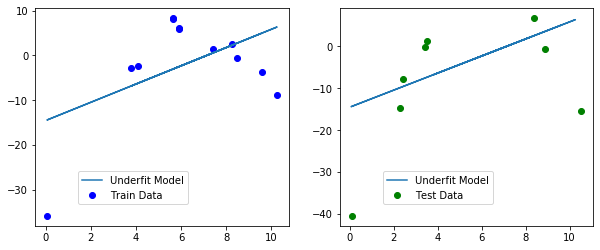

In [27]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue',label='Train Data')
plt.plot(X_train.reshape(-1, 1), reg.predict(X_train.reshape(-1, 1)),label='Underfit Model')
plt.legend(loc=[0.17, 0.1])

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green',label='Test Data')
plt.plot(X_train.reshape(-1, 1), reg.predict(X_train.reshape(-1, 1)),label='Underfit Model')
plt.legend(loc=[0.17, 0.1]);

In [17]:
poly = PolynomialFeatures(8)
x_fin = poly.fit_transform(X_train.reshape(-1, 1))
reg_poly = LinearRegression().fit(x_fin, y_train)

In [18]:
X_linspace = np.linspace(0, 11, 30)
X_linspace_fin = poly.fit_transform(X_linspace.reshape(-1,1))
y_poly_pred = reg_poly.predict(X_linspace_fin)

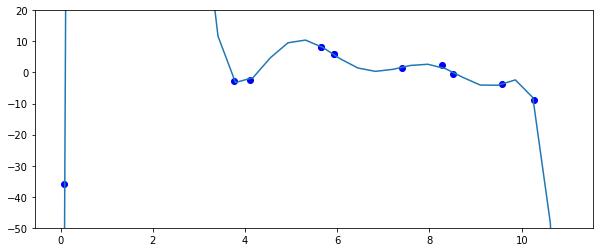

In [19]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, color='blue',)
plt.plot(X_linspace, y_poly_pred)
plt.ylim(bottom=-50,top=20);


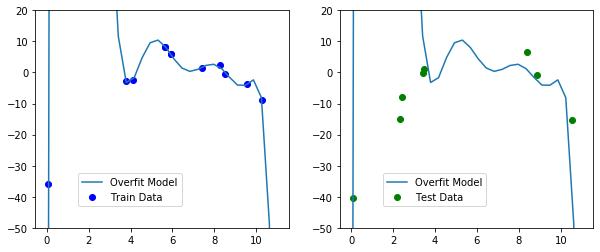

In [20]:
# Plot 6th degree polynomial fit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue',label='Train Data')
plt.plot(X_linspace, y_poly_pred,label='Overfit Model')
plt.ylim(bottom=-50,top=20)
plt.legend(loc=[0.17, 0.1])

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green',label='Test Data')
plt.plot(X_linspace, y_poly_pred,label='Overfit Model')
plt.ylim(bottom=-50,top=20)
plt.legend(loc=[0.17, 0.1]);

In [21]:
poly = PolynomialFeatures(2)
x_fin = poly.fit_transform(x.reshape(-1, 1))
reg_poly = LinearRegression().fit(x_fin, y)
X_linspace = np.linspace(0, 11, 30)
X_linspace_fin = poly.fit_transform(X_linspace.reshape(-1,1))
y_poly_pred = reg_poly.predict(X_linspace_fin)

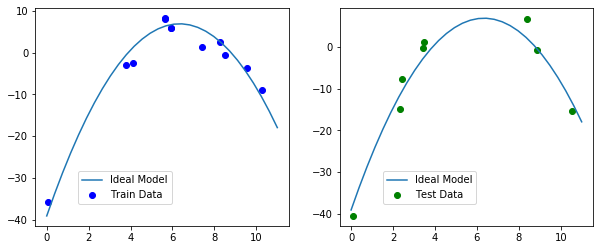

In [22]:
# Plot 6th degree polynomial fit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue',label='Train Data')
plt.plot(X_linspace, y_poly_pred,label='Ideal Model')
plt.legend(loc=[0.17, 0.1])

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green',label='Test Data')
plt.plot(X_linspace, y_poly_pred,label='Ideal Model')
plt.legend(loc=[0.17, 0.1]);